In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read in the data
df = pd.read_parquet('../data/transformed/dscovr_full_data.parquet', engine='pyarrow')

In [3]:
df

,Year,Day,Hour,Minute,points_in_IMF_avgs,Percent_interp.,CP/MV_Flag,Timeshift_sec,Phase_frnt_nrml_X,Phase_frnt_nrml_Y,...,Temperature_K,X_sc_GSE_Re,Y_sc_GSE_Re,Z_sc_GSE_Re,X_target_GSE_Re,Y_target_GSE_Re,Z_target_GSE_Re,RMS_target_Re,DBOT1_sec,DBOT2_sec
0,2016,1,0,0,999,999,9.9,999999,99.99,99.99,...,9999999.0,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,999999,999999
1,2016,1,0,5,999,999,9.9,999999,99.99,99.99,...,9999999.0,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,999999,999999
2,2016,1,0,10,999,999,9.9,999999,99.99,99.99,...,9999999.0,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,999999,999999
3,2016,1,0,15,999,999,9.9,999999,99.99,99.99,...,9999999.0,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,999999,999999
4,2016,1,0,20,999,999,9.9,999999,99.99,99.99,...,9999999.0,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,999999,999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2019,365,23,35,999,999,9.9,999999,99.99,99.99,...,9999999.0,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,999999,999999
420764,2019,365,23,40,999,999,9.9,999999,99.99,99.99,...,9999999.0,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,999999,999999
420765,2019,365,23,45,999,999,9.9,999999,99.99,99.99,...,9999999.0,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,999999,999999
420766,2019,365,23,50,999,999,9.9,999999,99.99,99.99,...,9999999.0,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,9999.99,999999,999999


In [4]:
columns_of_interest = ['Bz_nT_GSM', 'Vx_Velocity_kms_GSE', 'Proton_Density_ncc']
df[columns_of_interest].head(20)

,Bz_nT_GSM,Vx_Velocity_kms_GSE,Proton_Density_ncc
0,9999.99,99999.9,999.99
1,9999.99,99999.9,999.99
2,9999.99,99999.9,999.99
3,9999.99,99999.9,999.99
4,9999.99,99999.9,999.99
5,9999.99,99999.9,999.99
6,9999.99,99999.9,999.99
7,9999.99,99999.9,999.99
8,9999.99,99999.9,999.99
9,9999.99,99999.9,999.99


In [5]:
# Explicitly replace the identified anomalous values with NaN
df['Bz_nT_GSM'] = df['Bz_nT_GSM'].replace(9999.99, np.nan)
df['Vx_Velocity_kms_GSE'] = df['Vx_Velocity_kms_GSE'].replace(99999.9, np.nan)
df['Proton_Density_ncc'] = df['Proton_Density_ncc'].replace(999.99, np.nan)

# Display the cleaned data for verification
df[columns_of_interest].head()


,Bz_nT_GSM,Vx_Velocity_kms_GSE,Proton_Density_ncc
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


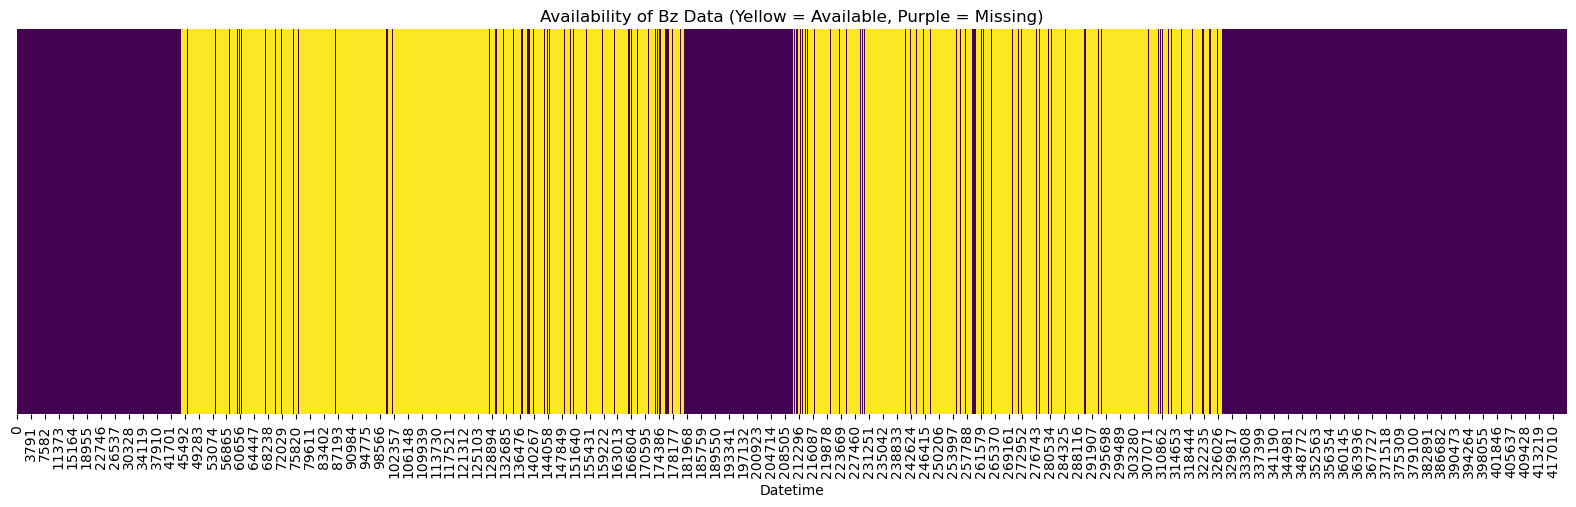

In [6]:
# Create a binary column for the presence of Bz data (1 if data is available, 0 if missing)
df['Bz_Present'] = ~df['Bz_nT_GSM'].isna() * 1

# Heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(df[['Bz_Present']].T, cmap='viridis', cbar=False, yticklabels=False)
plt.xlabel('Datetime')
plt.title('Availability of Bz Data (Yellow = Available, Purple = Missing)')
plt.show()


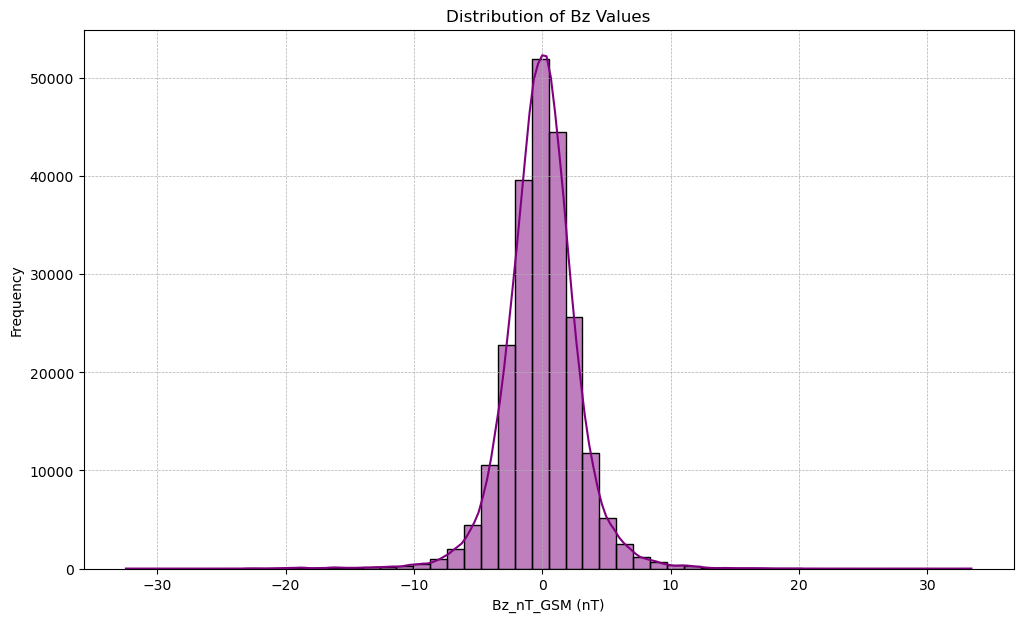

In [7]:
# Histogram for Bz values
plt.figure(figsize=(12, 7))
sns.histplot(df['Bz_nT_GSM'], bins=50, color='purple', kde=True)
plt.xlabel('Bz_nT_GSM (nT)')
plt.ylabel('Frequency')
plt.title('Distribution of Bz Values')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


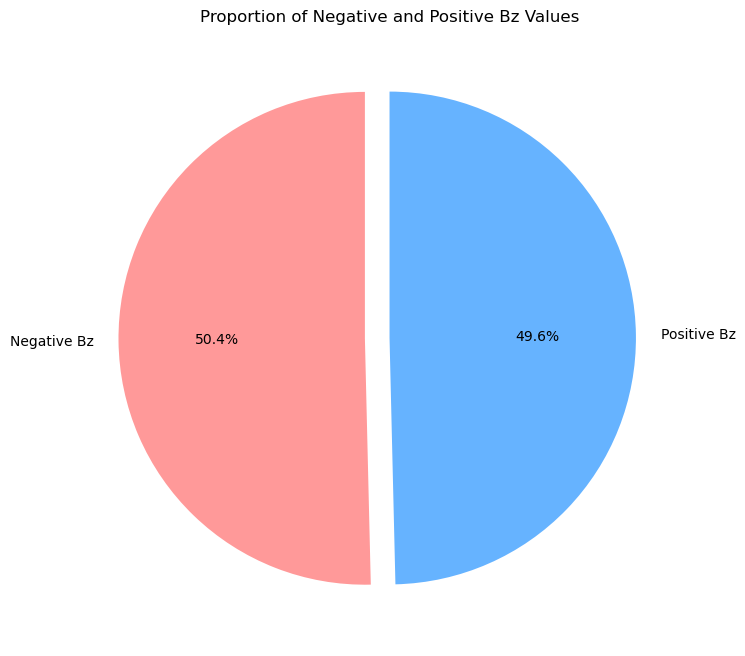

In [8]:
# Count the number of negative and positive Bz values
bz_negative_count = (df['Bz_nT_GSM'] < 0).sum()
bz_positive_count = (df['Bz_nT_GSM'] > 0).sum()

# Pie chart
labels = ['Negative Bz', 'Positive Bz']
sizes = [bz_negative_count, bz_positive_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Negative and Positive Bz Values')
plt.show()

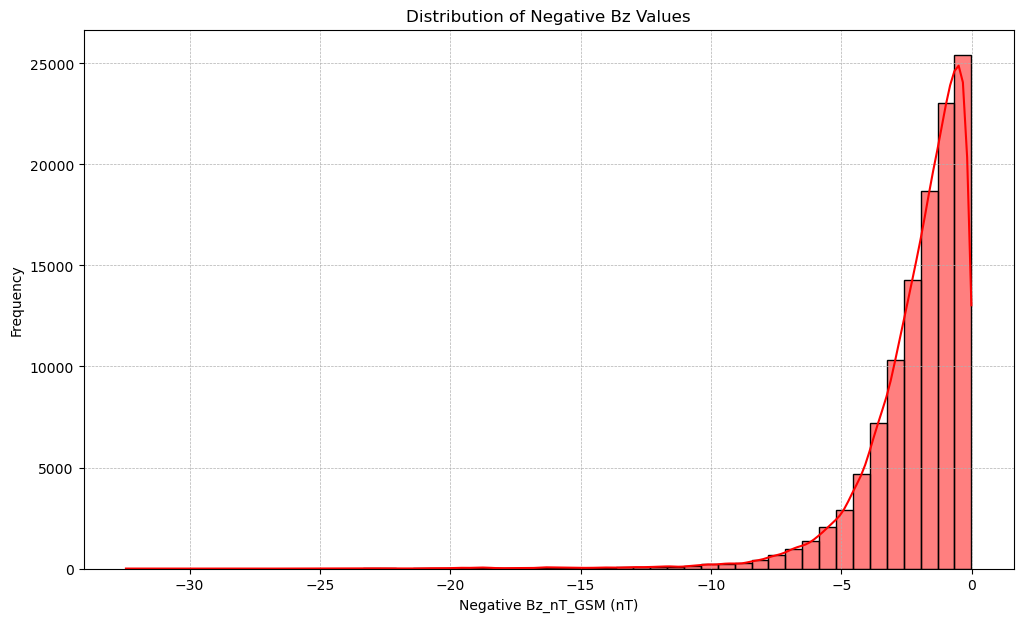

In [9]:
# Extract negative Bz values
negative_bz_values = df[df['Bz_nT_GSM'] < 0]['Bz_nT_GSM']

# Histogram for negative Bz values
plt.figure(figsize=(12, 7))
sns.histplot(negative_bz_values, bins=50, color='red', kde=True)
plt.xlabel('Negative Bz_nT_GSM (nT)')
plt.ylabel('Frequency')
plt.title('Distribution of Negative Bz Values')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


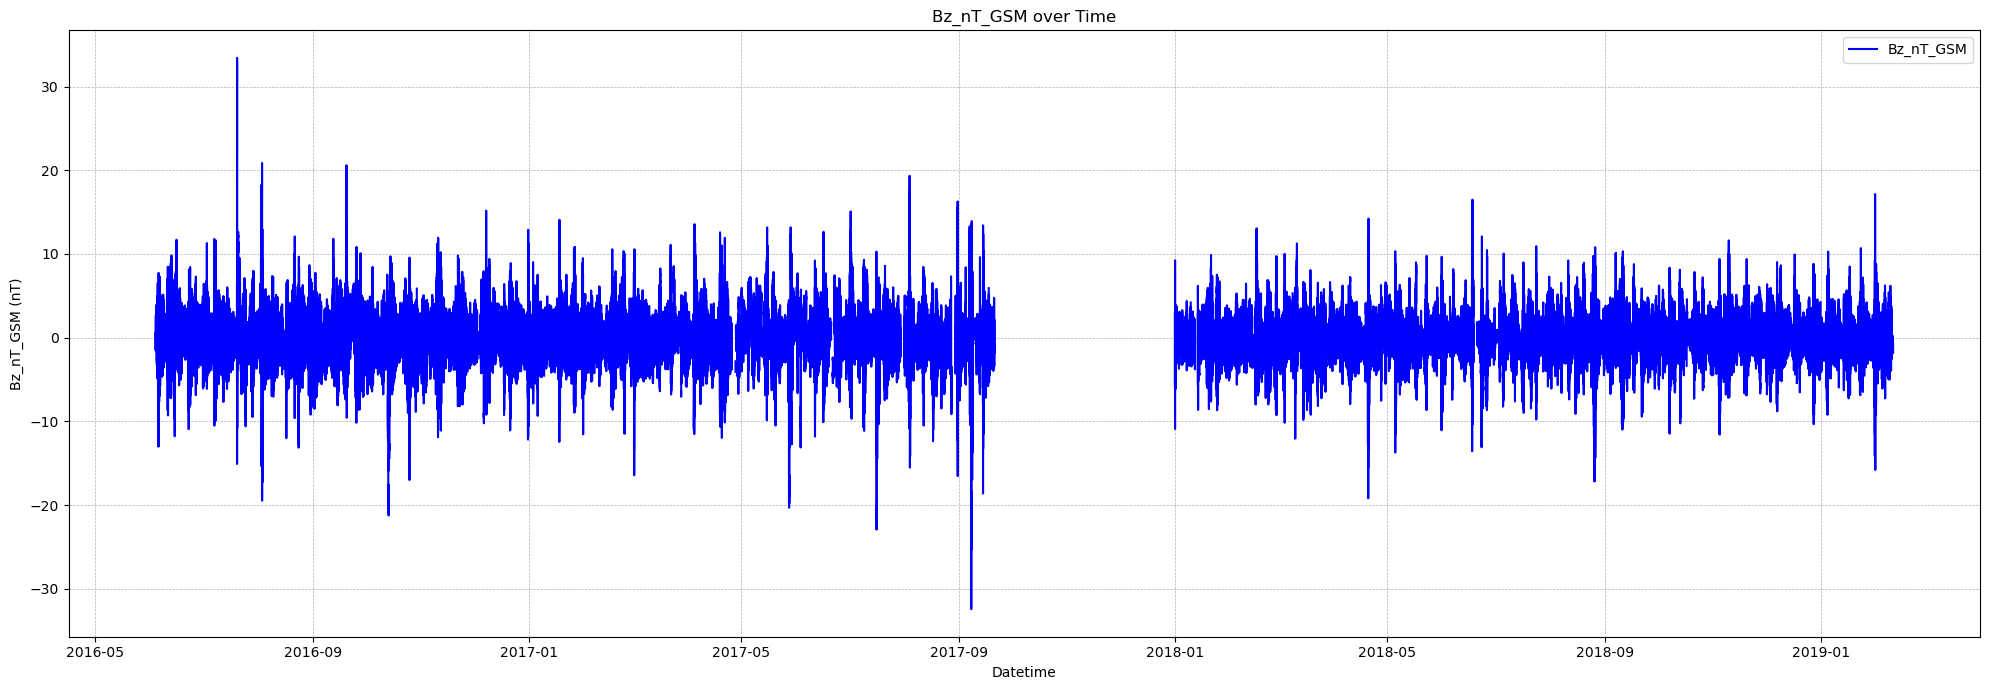

In [10]:
# Create datetime column
df['Datetime'] = pd.to_datetime(df['Year'].astype(str) + 
                                      df['Day'].astype(str).str.zfill(3), format='%Y%j') + \
                      pd.to_timedelta(df['Hour'], unit='h') + \
                      pd.to_timedelta(df['Minute'], unit='m')

# Plot Bz_nT_GSM over time
plt.figure(figsize=(20, 7))
plt.plot(df['Datetime'], df['Bz_nT_GSM'], color='blue', label='Bz_nT_GSM')
plt.xlabel('Datetime')
plt.ylabel('Bz_nT_GSM (nT)')
plt.title('Bz_nT_GSM over Time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [11]:
# Calculate descriptive statistics for Bz values
bz_stats = df['Bz_nT_GSM'].describe()
bz_threshold_value = bz_stats['25%']
bz_threshold_value

-1.59

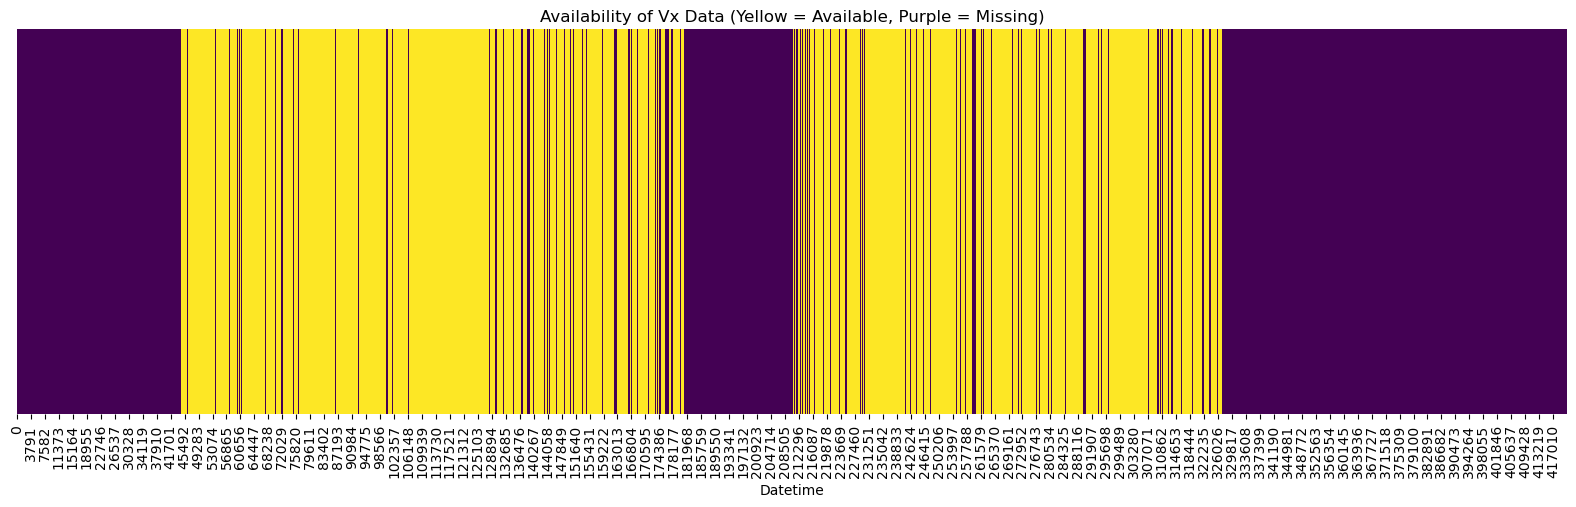

In [12]:
# Create a binary column for the presence of Vx data (1 if data is available, 0 if missing)
df['Vx_Present'] = ~df['Vx_Velocity_kms_GSE'].isna() * 1

# Heatmap for Vx data availability
plt.figure(figsize=(20, 5))
sns.heatmap(df[['Vx_Present']].T, cmap='viridis', cbar=False, yticklabels=False)
plt.xlabel('Datetime')
plt.title('Availability of Vx Data (Yellow = Available, Purple = Missing)')
plt.show()

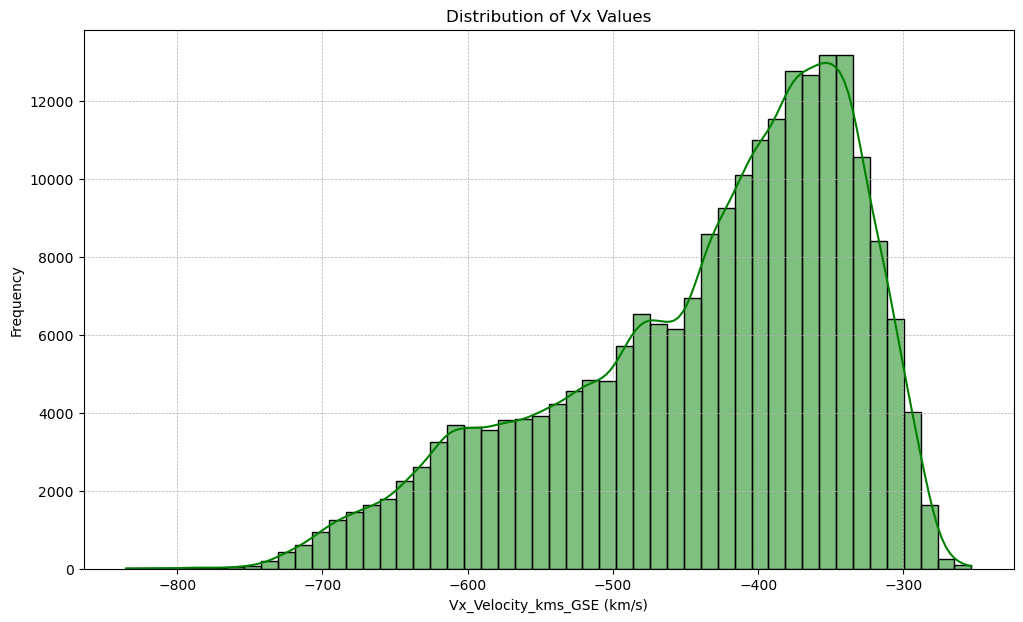

In [13]:
#  Histogram for Vx values
plt.figure(figsize=(12, 7))
sns.histplot(df['Vx_Velocity_kms_GSE'], bins=50, color='green', kde=True)
plt.xlabel('Vx_Velocity_kms_GSE (km/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Vx Values')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

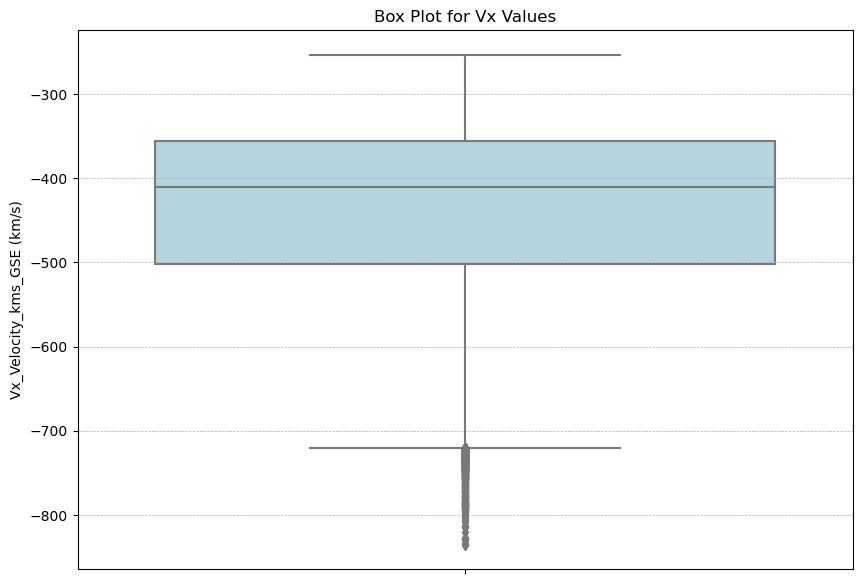

In [14]:
# 1. Box Plot for Vx values
plt.figure(figsize=(10, 7))
sns.boxplot(y=df['Vx_Velocity_kms_GSE'], color='lightblue')
plt.ylabel('Vx_Velocity_kms_GSE (km/s)')
plt.title('Box Plot for Vx Values')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.show()


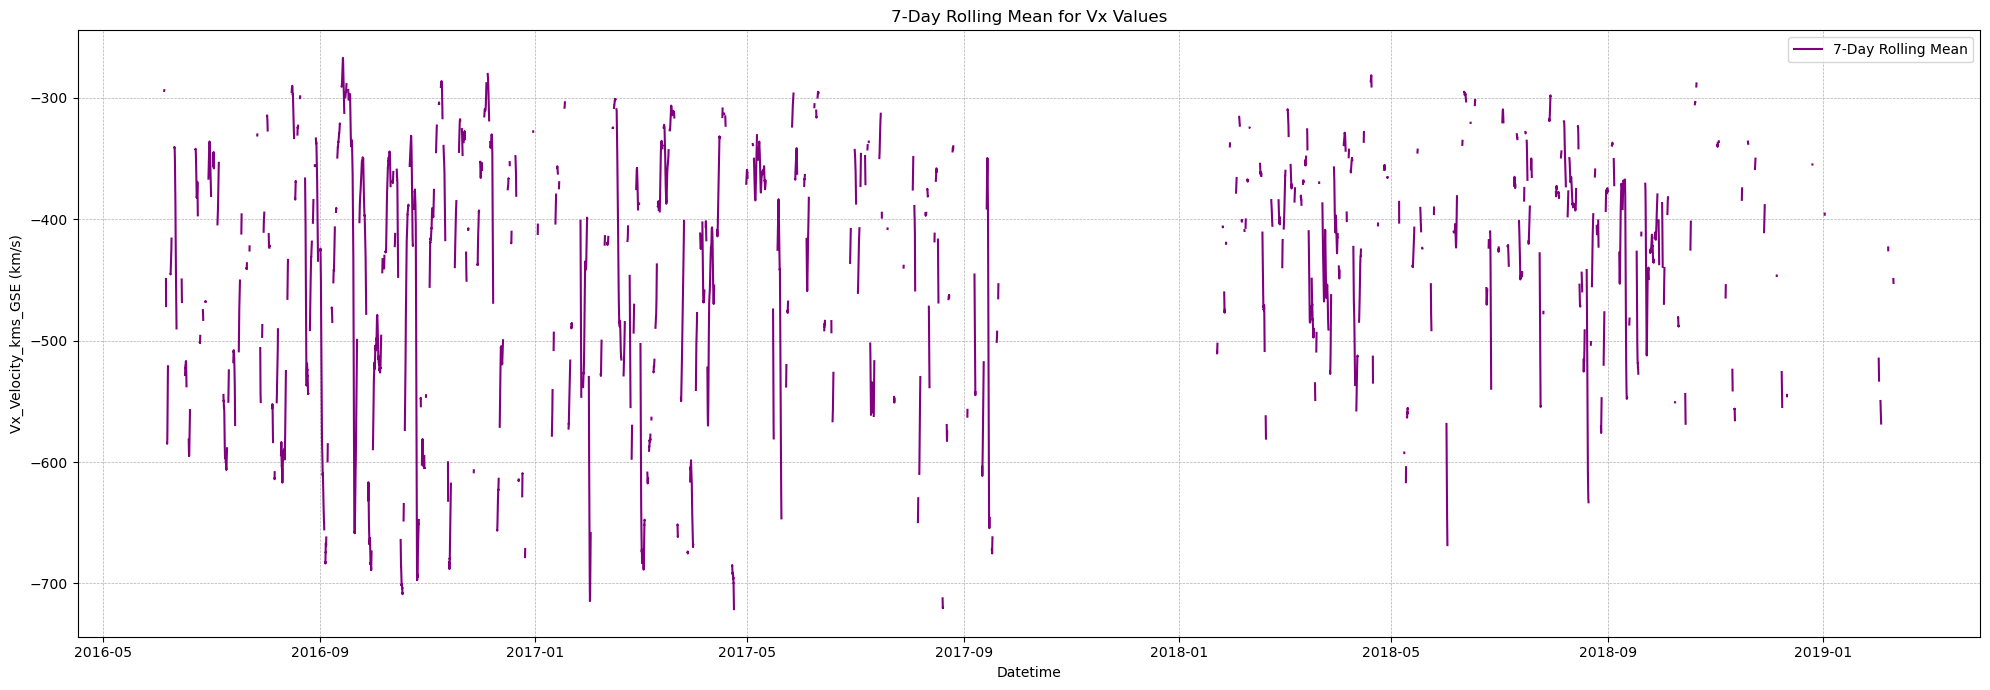

In [15]:
rolling_mean = df['Vx_Velocity_kms_GSE'].rolling(window=7*24).mean()  # 7 days * 24 hours

plt.figure(figsize=(20, 7))
plt.plot(df['Datetime'], rolling_mean, color='purple', label='7-Day Rolling Mean')
plt.xlabel('Datetime')
plt.ylabel('Vx_Velocity_kms_GSE (km/s)')
plt.title('7-Day Rolling Mean for Vx Values')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [16]:
# Calculate descriptive statistics for solar wind speed values
vx_stats = df['Vx_Velocity_kms_GSE'].describe()
vx_threshold_value = vx_stats['75%']
vx_threshold_value

-356.1

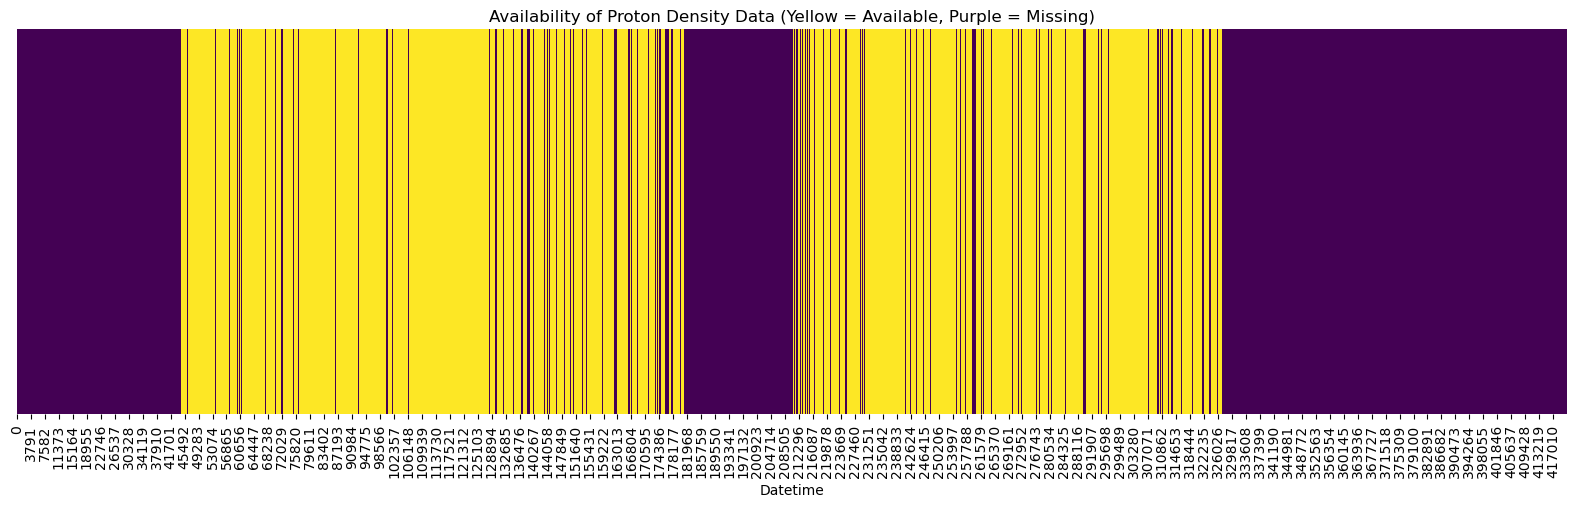

In [17]:
# Create a binary column for the presence of Proton Density data (1 if data is available, 0 if missing)
df['Proton_Density_Present'] = ~df['Proton_Density_ncc'].isna() * 1

# Heatmap for Proton Density data availability
plt.figure(figsize=(20, 5))
sns.heatmap(df[['Proton_Density_Present']].T, cmap='viridis', cbar=False, yticklabels=False)
plt.xlabel('Datetime')
plt.title('Availability of Proton Density Data (Yellow = Available, Purple = Missing)')
plt.show()



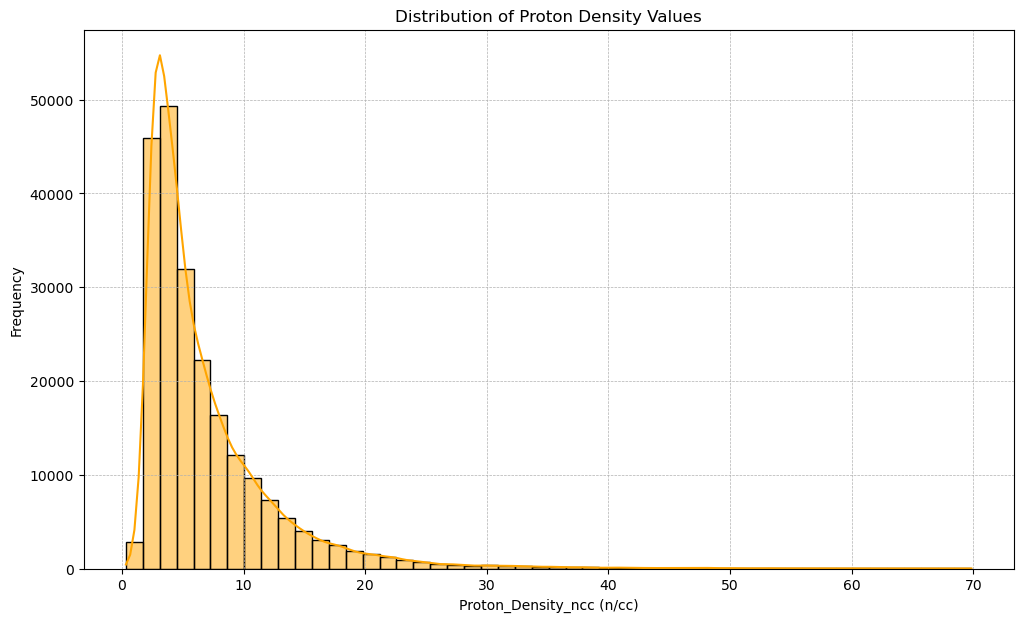

In [18]:
# Histogram for Proton Density values
plt.figure(figsize=(12, 7))
sns.histplot(df['Proton_Density_ncc'], bins=50, color='orange', kde=True)
plt.xlabel('Proton_Density_ncc (n/cc)')
plt.ylabel('Frequency')
plt.title('Distribution of Proton Density Values')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [19]:
# Calculate the statistical summary for proton density to determine its threshold
proton_density_stats = df['Proton_Density_ncc'].describe()

# Determine threshold for proton density deviations (e.g., more than 1 standard deviation from the mean)
proton_density_upper_threshold = proton_density_stats['mean'] + proton_density_stats['std']
proton_density_lower_threshold = proton_density_stats['mean'] - proton_density_stats['std']
df['Abs_Vx_Velocity_kms_GSE'] = df['Vx_Velocity_kms_GSE'].abs()
# Identify periods where all three conditions are met
reconnection_periods = df[
    (df['Bz_nT_GSM'] < bz_threshold_value) &
    (df['Abs_Vx_Velocity_kms_GSE'] > abs(vx_threshold_value)+100) &
    ((df['Proton_Density_ncc'] > proton_density_upper_threshold) | 
     (df['Proton_Density_ncc'] < proton_density_lower_threshold))
]

# Display the identified periods of interest
reconnection_periods[['Datetime', 'Bz_nT_GSM', 'Abs_Vx_Velocity_kms_GSE', 'Proton_Density_ncc']]


,Datetime,Bz_nT_GSM,Abs_Vx_Velocity_kms_GSE,Proton_Density_ncc
45112,2016-06-05 15:20:00,-7.76,457.0,13.77
45117,2016-06-05 15:45:00,-4.63,482.7,14.06
45118,2016-06-05 15:50:00,-7.17,500.8,13.35
45119,2016-06-05 15:55:00,-4.47,495.2,13.98
45122,2016-06-05 16:10:00,-5.73,493.8,13.74
...,...,...,...,...
254319,2018-06-02 01:15:00,-1.72,707.6,1.07
254320,2018-06-02 01:20:00,-1.77,708.3,1.02
259047,2018-06-18 11:15:00,-5.18,497.9,13.20
259048,2018-06-18 11:20:00,-4.08,505.0,13.36


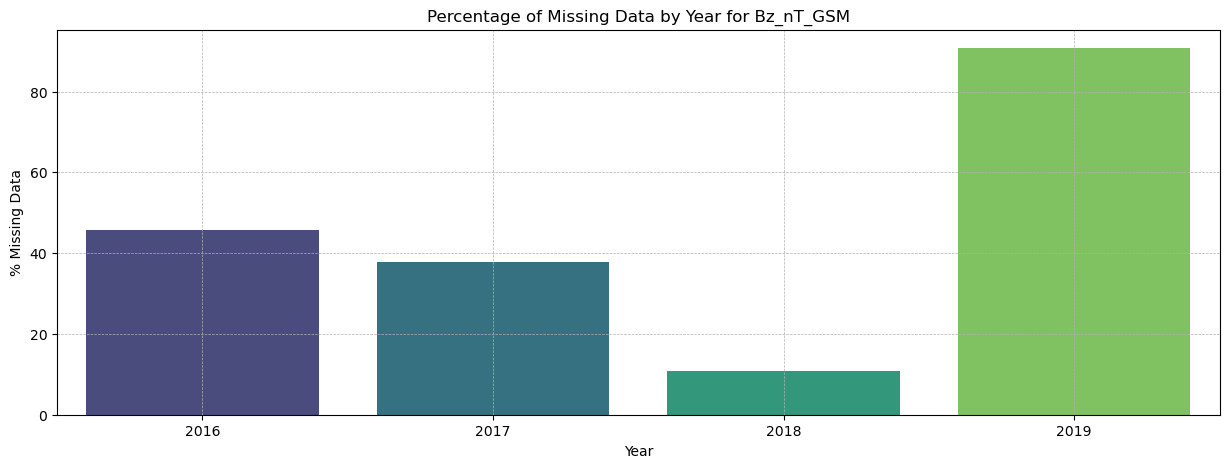

In [20]:
# Calculate the percentage of missing data for each year (avoiding 'Datetime' column duplication)
missing_data_percentage_yearly = df.set_index('Datetime').resample('Y').apply(lambda x: x.isnull().mean() * 100)
missing_data_percentage_yearly_reset = missing_data_percentage_yearly.reset_index()

# Plotting the percentage of missing data for each year for Bz_nT_GSM
plt.figure(figsize=(15, 5))
sns.barplot(x=missing_data_percentage_yearly_reset['Datetime'].dt.year, y='Bz_nT_GSM', data=missing_data_percentage_yearly_reset, palette='viridis')
plt.xlabel('Year')
plt.ylabel('% Missing Data')
plt.title('Percentage of Missing Data by Year for Bz_nT_GSM')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


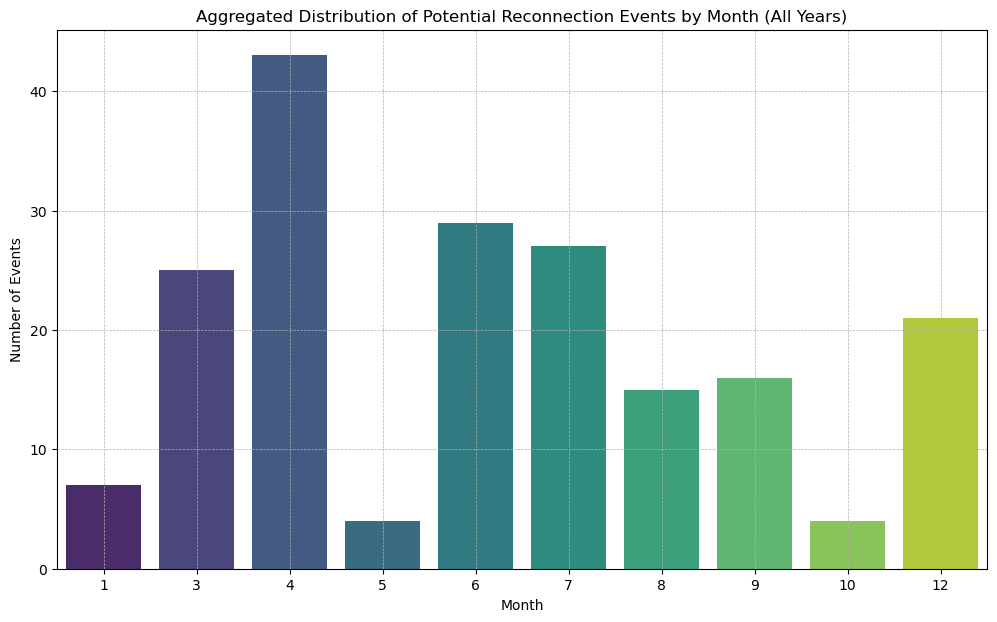

In [21]:
# Group by month alone (across all years) to get counts
reconnection_periods['Month'] = reconnection_periods['Datetime'].dt.month
aggregate_monthly_reconnection_counts = reconnection_periods.groupby(['Month']).size().reset_index(name='Count')

# Plot histogram of aggregated potential reconnection events by month
plt.figure(figsize=(12, 7))
sns.barplot(x='Month', y='Count', data=aggregate_monthly_reconnection_counts, \
            palette='viridis', ci=None)
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.title('Aggregated Distribution of Potential Reconnection Events by Month (All Years)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [22]:
vx_threshold_value

-356.1

In [23]:
bz_threshold_value

-1.59

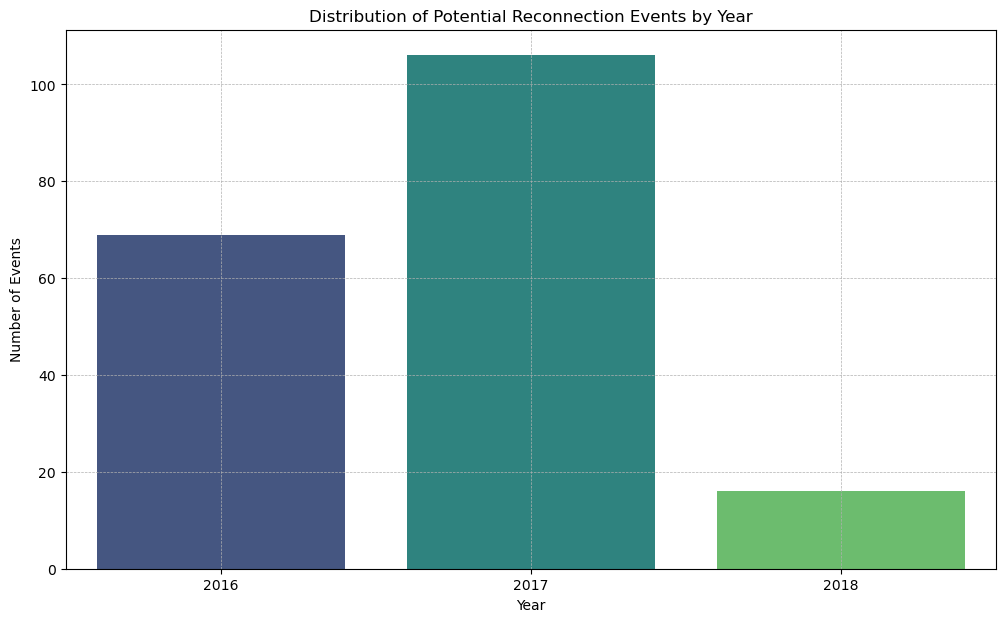

In [24]:
# Group by year to get counts
yearly_reconnection_counts = reconnection_periods.groupby(['Year']).size().reset_index(name='Count')

# Plot bar chart of potential reconnection events by year
plt.figure(figsize=(12, 7))
sns.barplot(x='Year', y='Count', data=yearly_reconnection_counts, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Distribution of Potential Reconnection Events by Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [26]:
reconnection_periods.to_csv('../data/transformed/dscov_reconnection_periods.csv', index=False)